# Data Pre-processing

### Extracting the data

In [1]:
!tar -xvzf cifar-10-python.tar.gz
!tar -xvzf cifar-100-python.tar.gz

x cifar-10-batches-py/
x cifar-10-batches-py/data_batch_4
x cifar-10-batches-py/readme.html
x cifar-10-batches-py/test_batch
x cifar-10-batches-py/data_batch_3
x cifar-10-batches-py/batches.meta
x cifar-10-batches-py/data_batch_2
x cifar-10-batches-py/data_batch_5
x cifar-10-batches-py/data_batch_1
x cifar-100-python/
x cifar-100-python/file.txt~
x cifar-100-python/train
x cifar-100-python/test
x cifar-100-python/meta


### Load CIFAR10

In [2]:
import pickle
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import random

def unpickle(file):
    with open(file, 'rb') as f:
        return pickle.load(f, encoding='bytes')

# CIFAR-10
meta10 = unpickle("cifar-10-batches-py/batches.meta")
cifar10_classes = [x.decode('utf-8') for x in meta10[b'label_names']]

print("CIFAR-10 classes:")
for i, name in enumerate(cifar10_classes):
    print(i, name)

CIFAR-10 classes:
0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


### Extract the ids we need for CIFAR-10

In [3]:
cifar10_needed_ids = [1, 2, 3, 4, 5, 7, 9] # automobile, bird, cat, deer, dog, horse, truck

X_train_10 = []
y_train_10 = []

for i in range(1, 6):
    batch = unpickle(f"cifar-10-batches-py/data_batch_{i}")
    X_train_10.append(batch[b'data'])
    y_train_10.append(batch[b'labels'])

X_train_10 = np.concatenate(X_train_10)
y_train_10 = np.concatenate(y_train_10)

# filter only needed CIFAR-10 classes
train_mask_10 = np.isin(y_train_10, cifar10_needed_ids)
X_train_10_filtered = X_train_10[train_mask_10]
y_train_10_filtered = y_train_10[train_mask_10]

# filter CIFAR-10 test batch
test_batch = unpickle("cifar-10-batches-py/test_batch")
X_test_10 = test_batch[b'data']
y_test_10 = np.array(test_batch[b'labels'])

test_mask_10 = np.isin(y_test_10, cifar10_needed_ids)
X_test_10_filtered = X_test_10[test_mask_10]
y_test_10_filtered = y_test_10[test_mask_10]

print(X_train_10_filtered.shape, y_train_10_filtered.shape)
print(X_test_10_filtered.shape, y_test_10_filtered.shape)

(35000, 3072) (35000,)
(7000, 3072) (7000,)


The shape of these matrices make sense as <br>
X_train_10 filtered 50,000 training images and we only took 7 classes out of 10 so that is 35,000, and it has 32px x 32px x 3(RGB) = 3072. y_train_10 filtered is also 35000 <br>
X_test_filtered has 7000 rows which makes sense as we originally had 10000 but took only 7 classes out of 10

### Load CIFAR100

In [4]:
# CIFAR-100
meta100 = unpickle("cifar-100-python/meta")
train_100 = unpickle("cifar-100-python/train")
test_100 = unpickle("cifar-100-python/test")

cifar100_fine_classes = [x.decode('utf-8') for x in meta100[b'fine_label_names']]
cifar100_coarse_classes = [x.decode('utf-8') for x in meta100[b'coarse_label_names']]

# Checking if our ids are correct

# print("CIFAR-100 fine labels:")
# for i, name in enumerate(cifar100_fine_classes):
#     print(i, name)

# print("\nCIFAR-100 coarse labels:")
# for i, name in enumerate(cifar100_coarse_classes):
#     print(i, name)

target_fine_classes = ['cattle', 'fox', 'baby', 'boy', 'girl', 'man', 'woman', 'rabbit', 'squirrel', 'bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train', 'lawn_mower', 'tractor', 'maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree']

cifar100_needed_ids = [i for i, name in enumerate(cifar100_fine_classes) if name in target_fine_classes]
print("Selected fine IDs:", cifar100_needed_ids)


Selected fine IDs: [2, 8, 11, 13, 19, 34, 35, 41, 46, 47, 48, 52, 56, 58, 59, 65, 80, 89, 90, 96, 98]


### Extract the ids we need for CIFAR-100

In [5]:
cifar100_needed_ids = [2, 8, 11, 13, 19, 34, 35, 41, 46, 47, 48, 52, 56, 58, 59, 65, 80, 89, 90, 96, 98]

X_train_100 = train_100[b'data']
y_train_100 = np.array(train_100[b'fine_labels'])

X_test_100 = test_100[b'data']
y_test_100 = np.array(test_100[b'fine_labels'])

# Filter only needed classes
train_mask_100 = np.isin(y_train_100, cifar100_needed_ids)
X_train_100_filtered = X_train_100[train_mask_100]
y_train_100_filtered = y_train_100[train_mask_100]

test_mask_100 = np.isin(y_test_100, cifar100_needed_ids)
X_test_100_filtered = X_test_100[test_mask_100]
y_test_100_filtered = y_test_100[test_mask_100]

print(X_train_100_filtered.shape, y_train_100_filtered.shape)
print(X_test_100_filtered.shape, y_test_100_filtered.shape)

(10500, 3072) (10500,)
(2100, 3072) (2100,)


Same here for CIFAR-100, we had 50,000 images but took 17 classes so 8500 images (500 * 17)<br>
The test data had 10,000 but we took 17 so now 1700

### Remapping Label as ID to avoid collision

In [ ]:
cifar10_selected_names = [cifar10_classes[i] for i in cifar10_needed_ids]
cifar100_selected_names = [cifar100_fine_classes[i] for i in cifar100_needed_ids]
all_class_names = list(dict.fromkeys(cifar10_selected_names + cifar100_selected_names))
label_map = {name: idx for idx, name in enumerate(all_class_names)}

print("Unified class count:", len(label_map))
print(label_map)


y_train_10_names = [cifar10_classes[i] for i in y_train_10_filtered]
y_train_10_new  = np.array([label_map[name] for name in y_train_10_names])
y_test_10_names = [cifar10_classes[i] for i in y_test_10_filtered]
y_test_10_new   = np.array([label_map[name] for name in y_test_10_names])

y_train_100_names = [cifar100_fine_classes[i] for i in y_train_100_filtered]
y_train_100_new   = np.array([label_map[name] for name in y_train_100_names])
y_test_100_names = [cifar100_fine_classes[i] for i in y_test_100_filtered]
y_test_100_new   = np.array([label_map[name] for name in y_test_100_names])


y_train_10_filtered = y_train_10_new
y_test_10_filtered  = y_test_10_new
y_train_100_filtered = y_train_100_new
y_test_100_filtered  = y_test_100_new


Unified class count: 28
{'automobile': 0, 'bird': 1, 'cat': 2, 'deer': 3, 'dog': 4, 'horse': 5, 'truck': 6, 'baby': 7, 'bicycle': 8, 'boy': 9, 'bus': 10, 'cattle': 11, 'fox': 12, 'girl': 13, 'lawn_mower': 14, 'man': 15, 'maple_tree': 16, 'motorcycle': 17, 'oak_tree': 18, 'palm_tree': 19, 'pickup_truck': 20, 'pine_tree': 21, 'rabbit': 22, 'squirrel': 23, 'tractor': 24, 'train': 25, 'willow_tree': 26, 'woman': 27}


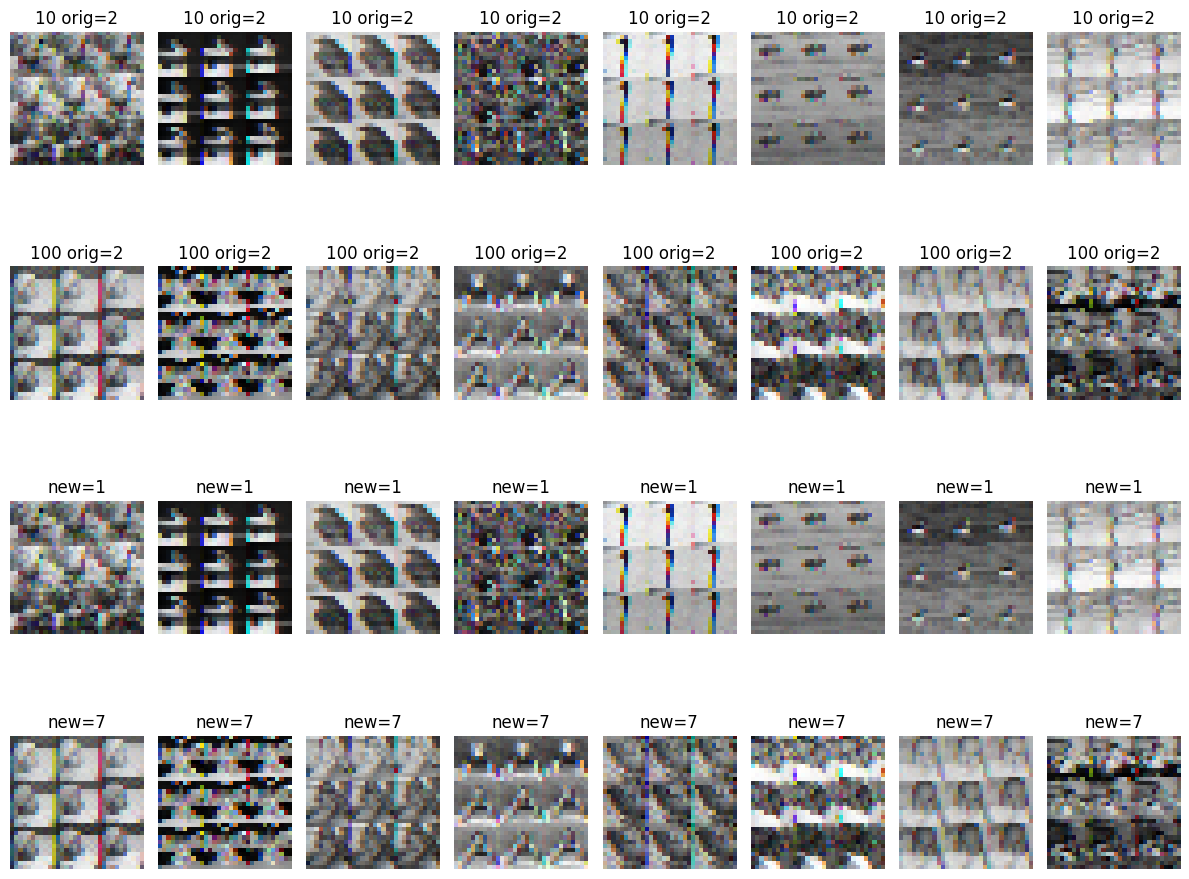

CIFAR-10 old label 2 to new label = 1
CIFAR-100 old label 2 to new label = 7


In [ ]:
orig_label = 2   # bird in CIFAR-10, beaver in CIFAR-100

# original array
indices_10_orig = np.where(y_train_10 == orig_label)[0][:8]
indices_100_orig = np.where(y_train_100 == orig_label)[0][:8]

new_label_10 = label_map[cifar10_classes[orig_label]]
new_label_100 = label_map[cifar100_fine_classes[orig_label]]

indices_10_new = np.where(y_train_10_filtered == new_label_10)[0][:8]
indices_100_new = np.where(y_train_100_filtered == new_label_100)[0][:8]

plt.figure(figsize=(12, 10))

for i, idx in enumerate(indices_10_orig):
    img = X_train_10[idx].reshape(32,32,3)
    plt.subplot(4, 8, i+1)
    plt.imshow(img)
    plt.title(f"10 orig=2")
    plt.axis("off")

for i, idx in enumerate(indices_100_orig):
    img = X_train_100[idx].reshape(32,32,3)
    plt.subplot(4, 8, i+1+8)
    plt.imshow(img)
    plt.title(f"100 orig=2")
    plt.axis("off")

for i, idx in enumerate(indices_10_new):
    img = X_train_10_filtered[idx].reshape(32,32,3)
    plt.subplot(4, 8, i+1+16)
    plt.imshow(img)
    plt.title(f"new={new_label_10}")
    plt.axis("off")

for i, idx in enumerate(indices_100_new):
    img = X_train_100_filtered[idx].reshape(32,32,3)
    plt.subplot(4, 8, i+1+24)
    plt.imshow(img)
    plt.title(f"new={new_label_100}")
    plt.axis("off")

plt.tight_layout()
plt.show()

print(f"CIFAR-10 old label 2 to new label = {new_label_10}")
print(f"CIFAR-100 old label 2 to new label = {new_label_100}")


### Combine CIFAR-10 and CIFAR-100 and save files

In [16]:
X_train_combined = np.concatenate([X_train_10_filtered, X_train_100_filtered])
y_train_combined = np.concatenate([y_train_10_filtered, y_train_100_filtered])

X_test_combined = np.concatenate([X_test_10_filtered, X_test_100_filtered])
y_test_combined = np.concatenate([y_test_10_filtered, y_test_100_filtered])

print(X_train_combined.shape, y_train_combined.shape)
print(X_test_combined.shape, y_test_combined.shape)

os.makedirs('combined', exist_ok=True)

train_data = {'features': X_train_combined, 'labels': y_train_combined}
test_data  = {'features': X_test_combined, 'labels': y_test_combined}

# 0.1 for 10% of training split
val_split = int(0.1 * X_train_combined.shape[0])
val_data = {'features': X_train_combined[:val_split], 'labels': y_train_combined[:val_split]}
train_data = {'features': X_train_combined[val_split:], 'labels': y_train_combined[val_split:]}

with open('combined/train.p', 'wb') as f:
    pickle.dump(train_data, f)
with open('combined/valid.p', 'wb') as f:
    pickle.dump(val_data, f)
with open('combined/test.p', 'wb') as f:
    pickle.dump(test_data, f)

(45500, 3072) (45500,)
(9100, 3072) (9100,)


Now we are reading in the train_data, val_data and test_data that we just created and checking the shape

In [17]:
with open('combined/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('combined/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('combined/test.p', 'rb') as f:
    test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(40950, 3072) (4550, 3072) (9100, 3072)
(40950,) (4550,) (9100,)


We need to reshape it to the correct size to be able to apply pre-processing to it

In [18]:
X_train = X_train.reshape(-1, 32, 32, 3)
X_val = X_val.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

print(X_train.shape, X_val.shape, X_test.shape)

(40950, 32, 32, 3) (4550, 32, 32, 3) (9100, 32, 32, 3)


### Data Pre-processing

In [19]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def equalize(img):
    return cv2.equalizeHist(img)

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255.0
    return img


### Displaying each

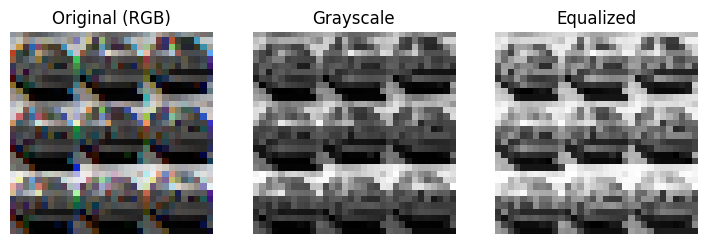

In [20]:
random_index = 555
img_original = X_train[random_index]

img_gray = grayscale(img_original)
img_equalized = equalize(img_gray)
img_normalized = img_equalized / 255.0

plt.figure(figsize=(12, 3))

# our orignial image
plt.subplot(1, 4, 1)
plt.imshow(img_original)
plt.title("Original (RGB)")
plt.axis("off")

# grayscale
plt.subplot(1, 4, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

# equalized
plt.subplot(1, 4, 3)
plt.imshow(img_equalized, cmap='gray')
plt.title("Equalized")
plt.axis("off")

plt.show()

### Reshaping

In [21]:
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

# Data Exploration

In [22]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (40950, 32, 32, 1) (40950,)
Validation set shape: (4550, 32, 32, 1) (4550,)
Test set shape: (9100, 32, 32, 1) (9100,)


In [23]:
print("Unique CIFAR-10 labels:", np.unique(y_train_10_filtered))
print("Unique CIFAR-100 labels:", np.unique(y_train_100_filtered))
print("Combined:", np.unique(y_train_combined))


Unique CIFAR-10 labels: [0 1 2 3 4 5 6]
Unique CIFAR-100 labels: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Combined: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


Number of classes: 28


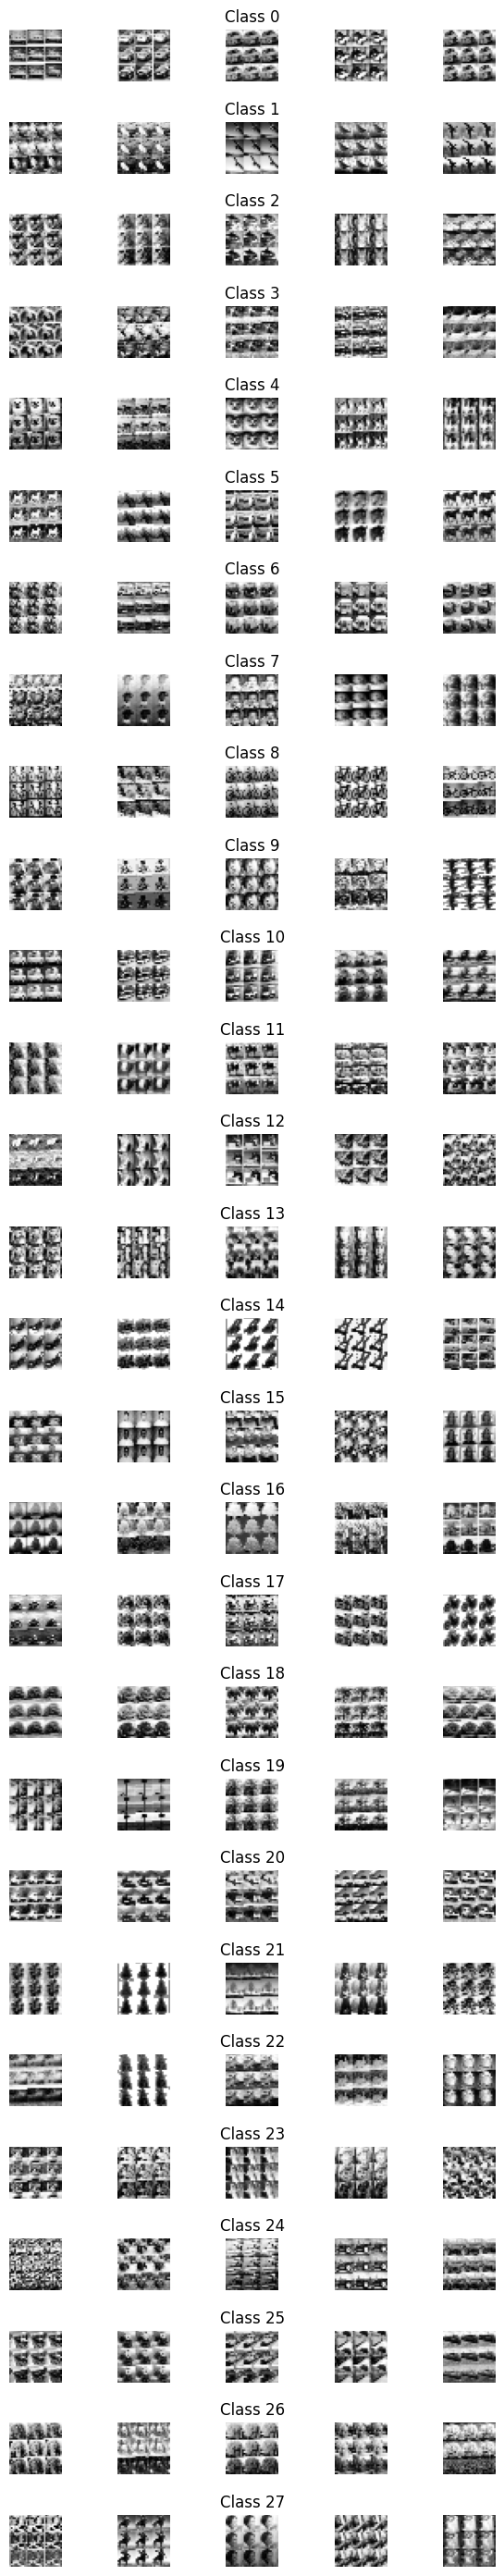

In [24]:
num_of_samples = []
cols = 5
classes = np.unique(y_train)
num_classes = len(classes)
print("Number of classes:", num_classes)

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(6, num_classes))
fig.tight_layout(pad=1)

for class_id_idx, class_id in enumerate(classes):
    x_selected = X_train[y_train == class_id]

    num_of_samples.append(len(x_selected))

    for col in range(cols):
        axs[class_id_idx][col].imshow(x_selected[random.randint(0, len(x_selected)-1), :, :, 0], cmap='gray')
        axs[class_id_idx][col].axis("off")

        if col == cols // 2:
            axs[class_id_idx][col].set_title(f"Class {class_id}")

plt.show()


[4397, 4326, 4360, 4323, 4363, 4351, 4330, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]


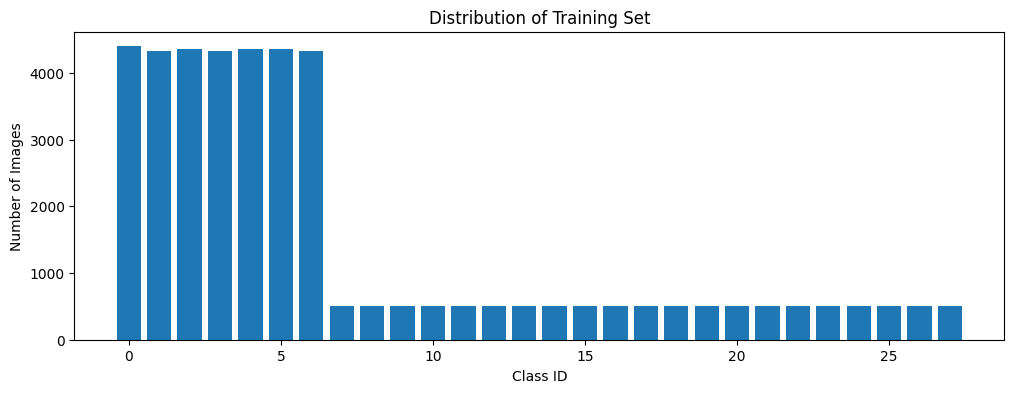

In [28]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(classes, num_of_samples)
plt.title("Distribution of Training Set")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

### Data Augmentation Demonstration (John's)

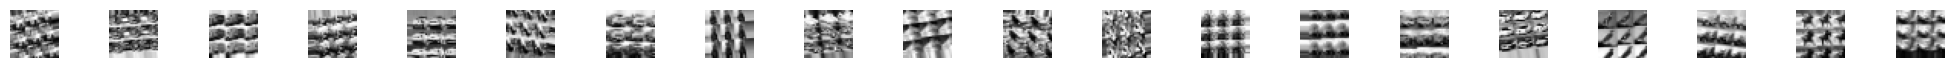

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range = 0.1, zoom_range = 0.2, shear_range = 0.1, rotation_range=10)
datagen.fit(X_train)
batches = datagen.flow(X_train, y_train, batch_size = 20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 20, figsize=(20, 5))
fig.tight_layout()
for i in range(20):
  axs[i].imshow(X_batch[i].reshape(32, 32), cmap='gray')
  axs[i].axis('off')

### Data Augmentation

In [ ]:
TARGET_COUNT = 4300

X_train_balanced = []
y_train_balanced = []

classes = np.unique(y_train)

for c in classes:
    idx = np.where(y_train == c)[0]
    X_c = X_train[idx]
    y_c = y_train[idx]

    if len(X_c) >= TARGET_COUNT:
        X_train_balanced.append(X_c)
        y_train_balanced.append(y_c)
        continue

    needed = TARGET_COUNT - len(X_c)
    print(f"Class {c}: generating {needed} augmented images...")

    gen = datagen.flow(X_c, y_c, batch_size=32, shuffle=True)

    X_aug = []
    y_aug = []

    while len(X_aug) < needed:
        X_batch, y_batch = next(gen)
        X_aug.append(X_batch)
        y_aug.append(y_batch)

    X_aug = np.concatenate(X_aug)[:needed]
    y_aug = np.concatenate(y_aug)[:needed]

    X_train_balanced.append(np.concatenate([X_c, X_aug]))
    y_train_balanced.append(np.concatenate([y_c, y_aug]))

X_train = np.concatenate(X_train_balanced)
y_train = np.concatenate(y_train_balanced)

print("New training set:", X_train.shape, y_train.shape)


Class 7: generating 3800 augmented images...
Class 8: generating 3800 augmented images...
Class 9: generating 3800 augmented images...
Class 10: generating 3800 augmented images...
Class 11: generating 3800 augmented images...
Class 12: generating 3800 augmented images...
Class 13: generating 3800 augmented images...
Class 14: generating 3800 augmented images...
Class 15: generating 3800 augmented images...
Class 16: generating 3800 augmented images...
Class 17: generating 3800 augmented images...
Class 18: generating 3800 augmented images...
Class 19: generating 3800 augmented images...
Class 20: generating 3800 augmented images...
Class 21: generating 3800 augmented images...
Class 22: generating 3800 augmented images...
Class 23: generating 3800 augmented images...
Class 24: generating 3800 augmented images...
Class 25: generating 3800 augmented images...
Class 26: generating 3800 augmented images...
Class 27: generating 3800 augmented images...
New training set: (120750, 32, 32, 1)

In [ ]:
save_path = "combined"
os.makedirs(save_path, exist_ok=True)

train_balanced_data = {
    "features": X_train,
    "labels": y_train
}

with open(os.path.join(save_path, "train_balanced.p"), "wb") as f:
    pickle.dump(train_balanced_data, f)

print("Saved to:", os.path.join(save_path, "train_balanced.p"))
print("Saved shape:", X_train.shape, y_train.shape)

Balanced dataset saved to: combined\train_balanced.p
Saved shape: (120750, 32, 32, 1) (120750,)


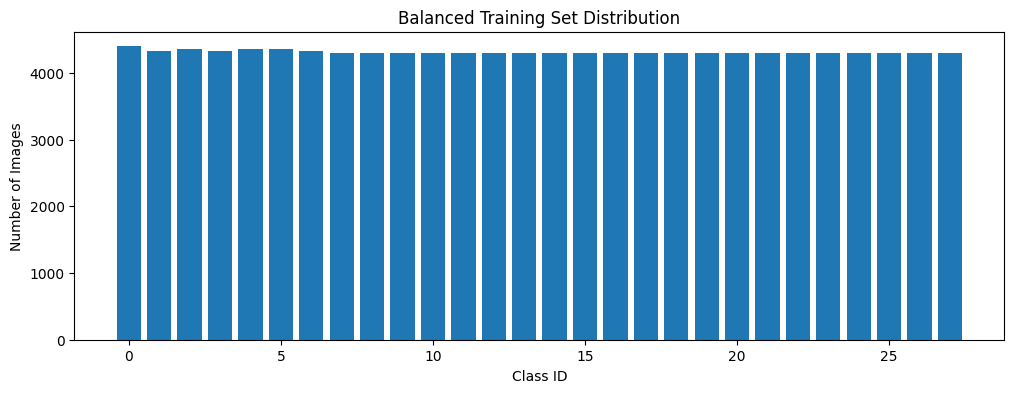

[4397, 4326, 4360, 4323, 4363, 4351, 4330, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300]


In [40]:
classes = np.unique(y_train)
num_samples_new = [len(np.where(y_train == c)[0]) for c in classes]

plt.figure(figsize=(12, 4))
plt.bar(classes, num_samples_new)
plt.title("Balanced Training Set Distribution")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

print(num_samples_new)
